# Principal Component Analysis with Cancer Data

In [139]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
#from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [140]:
df_cancer=pd.read_csv('breast-cancer-wisconsin-data.csv')

In [141]:
df_cancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [142]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [143]:
df_cancer.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [144]:
df_cancer.shape

(699, 11)

In [145]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 57.4+ KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [146]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

df_cancer.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [147]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

df_cancer[df_cancer.values=='?'].shape[0]


16

In [148]:
df_cancer[df_cancer['Bare Nuclei']=='?'].shape

(16, 11)

In [149]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [150]:
df_cancer.duplicated().sum()

8

In [151]:
df_cancer['Bare Nuclei']=pd.Categorical(df_cancer['Bare Nuclei']).codes

In [152]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int8
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), int8(1)
memory usage: 55.3 KB


In [153]:
df_cancer['Bare Nuclei'].replace(to_replace='?',value=df_cancer['Bare Nuclei'].median(),inplace=True)

In [154]:
df_cancer[df_cancer['Bare Nuclei']=='?'].shape[0]

0

In [155]:
df_cancer.drop_duplicates('ID',keep='first',inplace=True)
df_cancer.shape

(645, 11)

In [156]:
df_cancer = df_cancer.drop(labels = "ID", axis = 1)

In [157]:
df_cancer.shape

(645, 10)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [158]:
# Check for correlation of variable

In [159]:
df_cancer.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644764,0.655972,0.484922,0.515168,0.263730,0.561261,0.534934,0.346201,0.724706
Cell Size,0.644764,1.000000,0.903802,0.711410,0.749046,0.332869,0.761042,0.728274,0.457109,0.817567
Cell Shape,0.655972,0.903802,1.000000,0.685744,0.712025,0.348050,0.735134,0.722408,0.434820,0.815828
Marginal Adhesion,0.484922,0.711410,0.685744,1.000000,0.600940,0.210259,0.665414,0.593902,0.403777,0.700035
Single Epithelial Cell Size,0.515168,0.749046,0.712025,0.600940,1.000000,0.267661,0.617320,0.629214,0.480421,0.678963
Bare Nuclei,0.263730,0.332869,0.348050,0.210259,0.267661,1.000000,0.297019,0.338340,0.164769,0.378192
Normal Nucleoli,0.561261,0.761042,0.735134,0.665414,0.617320,0.297019,1.000000,0.663497,0.328683,0.755289
Bland Chromatin,0.534934,0.728274,0.722408,0.593902,0.629214,0.338340,0.663497,1.000000,0.414202,0.710121
Mitoses,0.346201,0.457109,0.434820,0.403777,0.480421,0.164769,0.328683,0.414202,1.000000,0.419997
Class,0.724706,0.817567,0.815828,0.700035,0.678963,0.378192,0.755289,0.710121,0.419997,1.000000


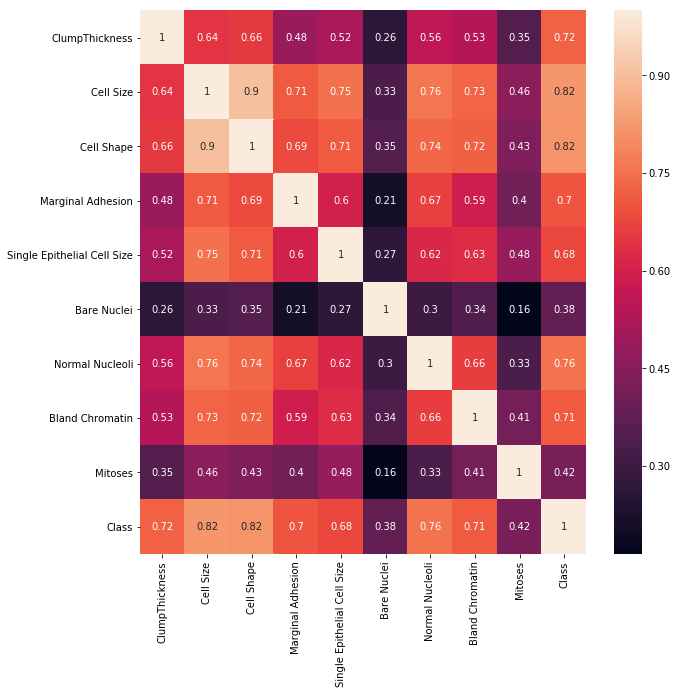

In [160]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cancer.corr(),annot=True)

In [161]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [162]:
#Let us check for pair plots

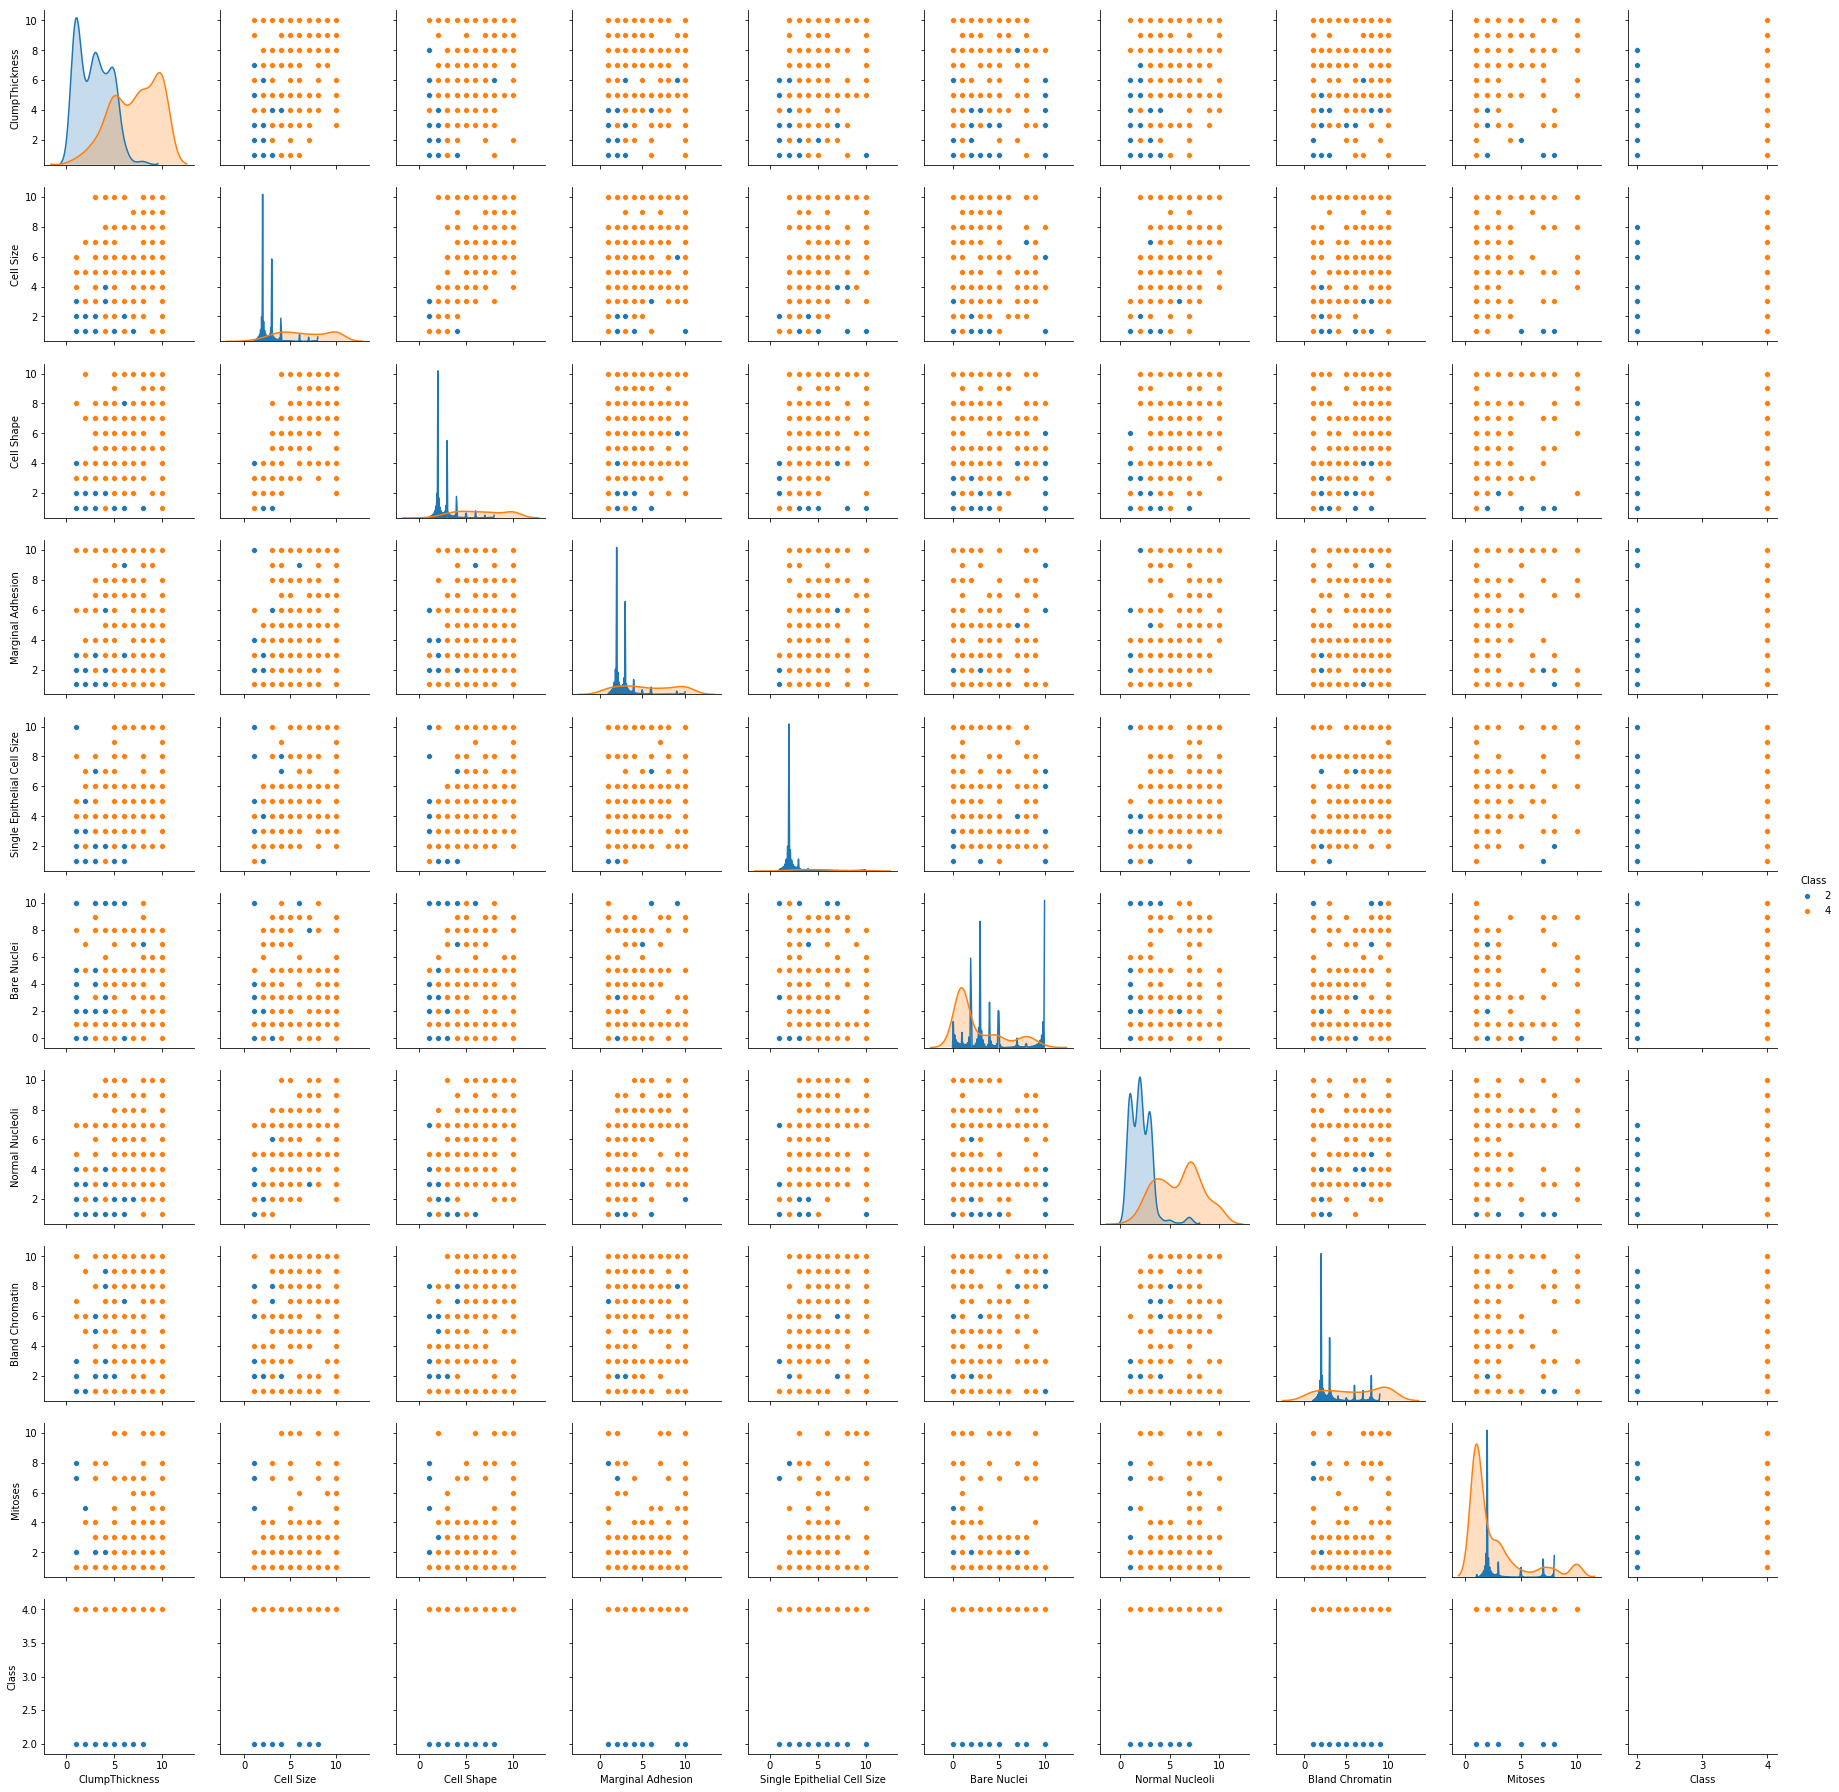

In [163]:
sns.pairplot(df_cancer,hue='Class',diag_kind='kde')

In [164]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [165]:
# We could see most of the outliers are now removed.

In [166]:
#X = df_cancer.drop(labels= "Class" , axis = 1)

In [167]:
##X = X.apply(zscore)

In [168]:
#y = df_cancer[["Class"]]

In [169]:
#X.head()

In [170]:
#y.head()

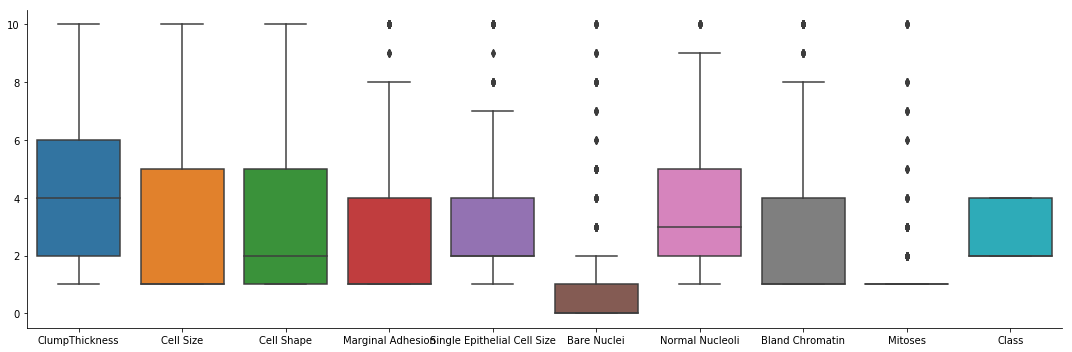

In [172]:
sns.catplot(data=df_cancer,kind='box',aspect=3)

## to check the presence of outliers using box plot

In [173]:
pd.crosstab(df_cancer['Mitoses'],df_cancer['Class'])
pd.crosstab(df_cancer['Normal Nucleoli'],df_cancer['Class'])
pd.crosstab(df_cancer['Bland Chromatin'],df_cancer['Class'])
pd.crosstab(df_cancer['Single Epithelial Cell Size'],df_cancer['Class'])
pd.crosstab(df_cancer['Marginal Adhesion'],df_cancer['Class'])
pd.crosstab(df_cancer['Bare Nuclei'],df_cancer['Class'])

## handling of outliers## we can see outliers in 6 attributes i.e Mitoses,Normal Nucleoli,Bland Chromatin
## Single Epithelial Cell Size,Marginal Adhesion,Bare Nuclei

Class,2,4
Bare Nuclei,,
0,347,15
1,2,124
2,18,9
3,14,14
4,6,13
5,10,18
6,0,4
7,1,7
8,1,18


In [174]:
df_cancer['Mitoses']=np.where(df_cancer['Mitoses']>1,1,df_cancer['Mitoses'])
df_cancer['Normal Nucleoli']=np.where(df_cancer['Normal Nucleoli']>9,9,df_cancer['Normal Nucleoli'])
df_cancer['Bland Chromatin']=np.where(df_cancer['Bland Chromatin']>7,7,df_cancer['Bland Chromatin'])
df_cancer['Single Epithelial Cell Size']=np.where(df_cancer['Bland Chromatin']>7,7,df_cancer['Bland Chromatin'])
df_cancer['Marginal Adhesion']=np.where(df_cancer['Marginal Adhesion']>8,8,df_cancer['Marginal Adhesion'])
df_cancer['Bare Nuclei']=np.where(df_cancer['Bare Nuclei']>1,1,df_cancer['Bare Nuclei'])

## handling of outliers 

## we can see outliers in 6 attributes i.e Mitoses,Normal Nucleoli,Bland Chromatin
## Single Epithelial Cell Size,Marginal Adhesion,Bare Nuclei, after treatment of ouliers , below box plot shows
## absence of outliers now across all attributes 

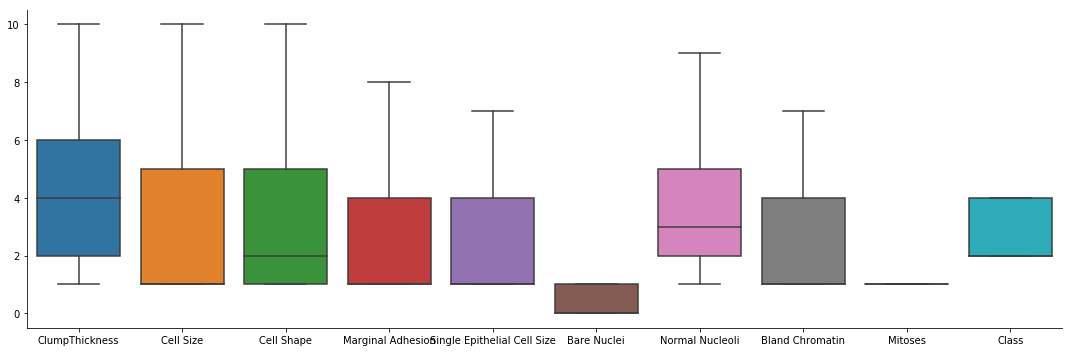

In [175]:
sns.catplot(data=df_cancer,kind='box',aspect=3)

In [176]:
X = df_cancer.drop(labels= "Class" , axis = 1)

In [177]:
X.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,1,0,3,1,1
1,5,4,4,5,2,1,3,2,1
2,3,1,1,1,1,1,3,1,1
3,6,8,8,1,7,1,3,7,1
4,4,1,1,3,1,0,3,1,1


In [178]:
y = df_cancer[["Class"]]

In [179]:
y.head()

,Class
0,2
1,2
2,2
3,2
4,2


In [180]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [181]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)  # scale training and test data independently to prevent data leaks
X_test_std = sc.fit_transform(X_test)

# Q6 Create a covariance matrix for identifying Principal components

In [182]:
# PCA
# Step 1 - Create covariance matrix


In [183]:
cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', cov_matrix)

('Covariance Matrix \n%s', array([[1.00222222, 0.6541539 , 0.66808719, 0.51698449, 0.57717287,
        0.52974712, 0.57350825, 0.57717287, 0.        ],
       [0.6541539 , 1.00222222, 0.89567049, 0.74200064, 0.76556028,
        0.62220316, 0.76651956, 0.76556028, 0.        ],
       [0.66808719, 0.89567049, 1.00222222, 0.71026639, 0.75038436,
        0.62925387, 0.73811726, 0.75038436, 0.        ],
       [0.51698449, 0.74200064, 0.71026639, 1.00222222, 0.64705725,
        0.5805276 , 0.65156522, 0.64705725, 0.        ],
       [0.57717287, 0.76556028, 0.75038436, 0.64705725, 1.00222222,
        0.60381361, 0.6803767 , 1.00222222, 0.        ],
       [0.52974712, 0.62220316, 0.62925387, 0.5805276 , 0.60381361,
        1.00222222, 0.60939214, 0.60381361, 0.        ],
       [0.57350825, 0.76651956, 0.73811726, 0.65156522, 0.6803767 ,
        0.60939214, 1.00222222, 0.6803767 , 0.        ],
       [0.57717287, 0.76556028, 0.75038436, 0.64705725, 1.00222222,
        0.60381361, 0.6803767 

# Q7 Identify eigen values and eigen vector

In [184]:
# Step 2- Get eigen values and eigen vector

In [185]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

('Eigen Vectors \n%s', array([[-3.09730288e-01, -5.23377129e-01, -7.09014392e-01,
        -1.36400270e-01,  1.99417389e-01,  2.62092594e-01,
        -1.94233169e-02, -2.74415245e-17,  0.00000000e+00],
       [-3.83393407e-01, -7.39853009e-02, -3.81636218e-04,
         2.92840072e-01, -8.79488187e-02, -4.38096635e-01,
        -7.49744330e-01,  9.42966968e-17,  0.00000000e+00],
       [-3.78901837e-01, -1.14024972e-01, -5.40785497e-02,
         2.35116882e-01, -7.43454145e-02, -5.94445708e-01,
         6.52942819e-01,  1.16498246e-17,  0.00000000e+00],
       [-3.37193925e-01, -1.01937236e-01,  4.43684068e-01,
         4.17920367e-01,  6.11259878e-01,  3.55520019e-01,
         6.60526255e-02,  3.56257058e-17,  0.00000000e+00],
       [-3.72790933e-01,  5.44991889e-01, -1.58270032e-01,
        -1.65092349e-01,  5.96204491e-02,  8.93033313e-02,
         1.32737335e-02, -7.07106781e-01,  0.00000000e+00],
       [-3.14809094e-01, -2.93156270e-01,  4.64391113e-01,
        -7.61065085e-01,  4.

# Q8 Find variance and cumulative variance by each eigen vector

In [186]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

('Cumulative Variance Explained', array([ 71.9479923 ,  79.17578419,  85.36908663,  91.14834172,
        95.41023124,  98.71608967, 100.        , 100.        ,
       100.        ]))


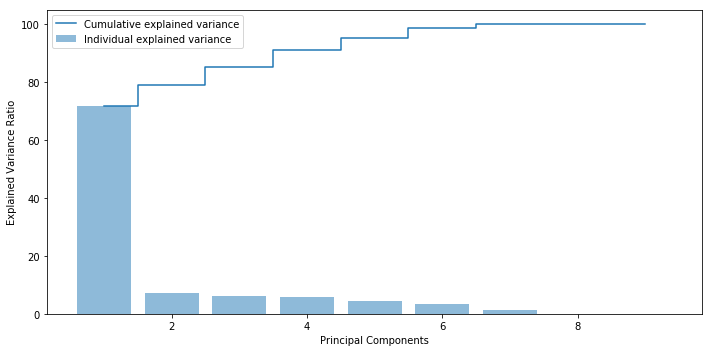

In [187]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [188]:
from sklearn.decomposition import PCA

In [189]:
data_pca=PCA(n_components=7)

In [190]:
data_pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [191]:
data_pca.transform(X_test)

array([[-5.13528522,  0.65797661, -0.02329919, ...,  0.78541987,
         0.13664962, -0.89810206],
       [13.33025439, -1.62932056, -1.27499495, ..., -1.20532347,
         0.14416803,  0.12890225],
       [ 9.18621586,  5.73433175,  1.67886263, ...,  3.38777015,
        -2.24311691, -0.08859224],
       ...,
       [-5.53603227,  1.51324383,  0.2927333 , ...,  0.84424602,
         0.13358958,  0.07521627],
       [-2.5312946 , -1.08118202,  1.27567784, ...,  1.17045337,
        -0.11027306,  0.34772983],
       [11.04870526,  3.4052245 ,  1.25240263, ..., -0.68009229,
        -1.87296475,  0.13522842]])

# Q10 Find correlation between components and features

In [192]:
data_pca.components_

array([[ 0.34445658,  0.47079138,  0.4532188 ,  0.32538227,  0.34819615,
         0.05629048,  0.32058461,  0.34819615, -0.        ],
       [-0.85380704,  0.02134262, -0.05345108,  0.16416046,  0.3455074 ,
        -0.00146018,  0.0447157 ,  0.3455074 ,  0.        ],
       [-0.31897196,  0.29436055,  0.2484792 ,  0.45176648, -0.50390674,
         0.00293947,  0.19473377, -0.50390674, -0.        ],
       [-0.21920725,  0.31265165,  0.41375185, -0.80512759, -0.06755613,
        -0.02000974,  0.15889636, -0.06755613,  0.        ],
       [-0.02963797,  0.20611199,  0.35529525,  0.08895185,  0.02192484,
        -0.02918817, -0.90591332,  0.02192484, -0.        ],
       [ 0.03337239,  0.74226884, -0.65711733, -0.07547044, -0.00839322,
        -0.03031236, -0.09677059, -0.00839322, -0.        ],
       [ 0.02400279, -0.00745683,  0.02766374,  0.03530048,  0.01863057,
        -0.99732113,  0.044869  ,  0.01863057,  0.        ]])

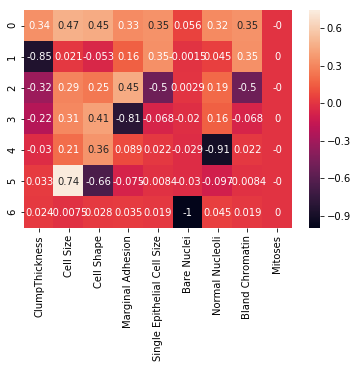

In [193]:
sns.heatmap(pd.DataFrame(data_pca.components_,columns=X.columns),annot=True)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [194]:
df_jokes=pd.read_csv('jokes.csv')

In [195]:
df_jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [196]:
ratings=df_jokes.drop(['NumJokes'],axis=1)
ratings.shape

(24983, 100)

In [197]:
ratings=ratings.drop(ratings.index[200:])
ratings.shape

## extracted first 200 rows and all columns considering the data heavy set and to analyse 200 rows and all
## columns as desired in the question

(200, 100)

In [198]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [199]:
ratings.replace(99,0,inplace=True)

In [200]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [201]:
ratings_diff=ratings.mean()

In [202]:
ratings_diff
ratings_diff.sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64

In [203]:
## top 10 jokes ID's are shown based on the rating 